In [36]:
import numpy as np                          # used for working with arrays

import matplotlib.pyplot as plt             # creating static, animated, and interactive visualizations

import matplotlib.image as mpimg            # provides functions for loading, displaying, and manipulating images

import cv2                                  # provides a binding for OpenCV, a popular computer vision library.

# OpenCV is a powerful library that can be used for a variety of tasks, including image processing, object detection, and machine learning.
'''
CV2 Functionalities - 
Load and display images
Resize, rotate, and crop images
Filter images
Detect objects in images
Track objects in videos
Train machine learning models for image classification and object detection
'''

from IPython.display import HTML, Video     #  an interactive command-line terminal for Python

from moviepy.editor import VideoFileClip    # MoviePy is a Python module for video editing. 
# It can be used for basic operations like cuts, concatenations, title insertions, non-linear editing, video processing, create advanced effects.

from PerspectiveTransformation import *     # change the perspective of a image or video for getting better insights into the required information.

from LaneLines import *                     # used to import all of the functions and classes defined in the LaneLines into the current namespace.

In [37]:
images = []
images.append(mpimg.imread('test_images/challenge_video_frame_1.jpg'))
images.append(mpimg.imread('test_images/challenge_video_frame_100.jpg'))
images.append(mpimg.imread('test_images/challenge_video_frame_110.jpg'))
images.append(mpimg.imread('test_images/challenge_video_frame_120.jpg'))
images.append(mpimg.imread('test_images/challenge_video_frame_130.jpg'))
images.append(mpimg.imread('test_images/challenge_video_frame_140.jpg'))

# read an image from a file into an array
# mpimg.imread function returns an array that contains the image data

In [38]:
images1 = []
images1.append(mpimg.imread('test_images/project_video_frame_1032.jpg'))
images1.append(mpimg.imread('test_images/project_video_frame_1048.jpg'))
images1.append(mpimg.imread('test_images/project_video_frame_235.jpg'))
images1.append(mpimg.imread('test_images/project_video_frame_810.jpg'))
images1.append(mpimg.imread('test_images/project_video_frame_551.jpg'))

In [39]:
images2 = []
images2.append(mpimg.imread('test_images/harder_challenge_video_frame_1.jpg'))
images2.append(mpimg.imread('test_images/harder_challenge_video_frame_10.jpg'))
images2.append(mpimg.imread('test_images/harder_challenge_video_frame_100.jpg'))
images2.append(mpimg.imread('test_images/harder_challenge_video_frame_200.jpg'))
images2.append(mpimg.imread('test_images/harder_challenge_video_frame_300.jpg'))
images2.append(mpimg.imread('test_images/harder_challenge_video_frame_400.jpg'))
images2.append(mpimg.imread('test_images/harder_challenge_video_frame_500.jpg'))
images2.append(mpimg.imread('test_images/harder_challenge_video_frame_600.jpg'))
images2.append(mpimg.imread('test_images/harder_challenge_video_frame_700.jpg'))
images2.append(mpimg.imread('test_images/harder_challenge_video_frame_800.jpg'))
images2.append(mpimg.imread('test_images/harder_challenge_video_frame_900.jpg'))
images2.append(mpimg.imread('test_images/harder_challenge_video_frame_1000.jpg'))
images2.append(mpimg.imread('test_images/harder_challenge_video_frame_1100.jpg'))

In [40]:
# This function takes an image, converts it to the HLS color space,
# and then plots the individual channels (Hue, Lightness, and Saturation) along with the original image. 

def plot(img):
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    f = plt.figure(figsize=(24, 9))
    ax1 = f.add_subplot(1, 3, 1)
    ax1.imshow(hls[:,:,0], cmap='gray', vmin=0, vmax=255)
    ax2 = f.add_subplot(1, 3, 2)
    ax2.imshow(hls[:,:,1], cmap='gray', vmin=0, vmax=255)
    ax3 = f.add_subplot(1, 3, 3)
    ax3.imshow(hls[:,:,2], cmap='gray', vmin=0, vmax=255)
    plt.figure()
    plt.imshow(img)

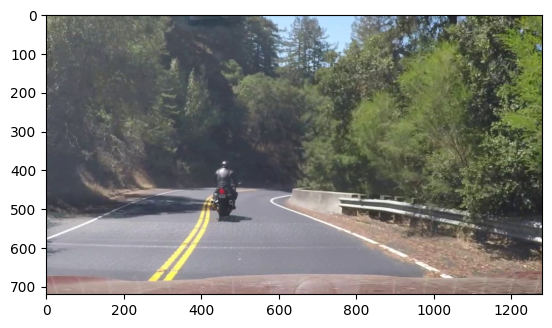

In [41]:
# perform a perspective transformation on an image.
# change the perspective of a image or video for getting better insights into the required information.

img = images2[2]
birdeye = PerspectiveTransformation()
plt.imshow(img)

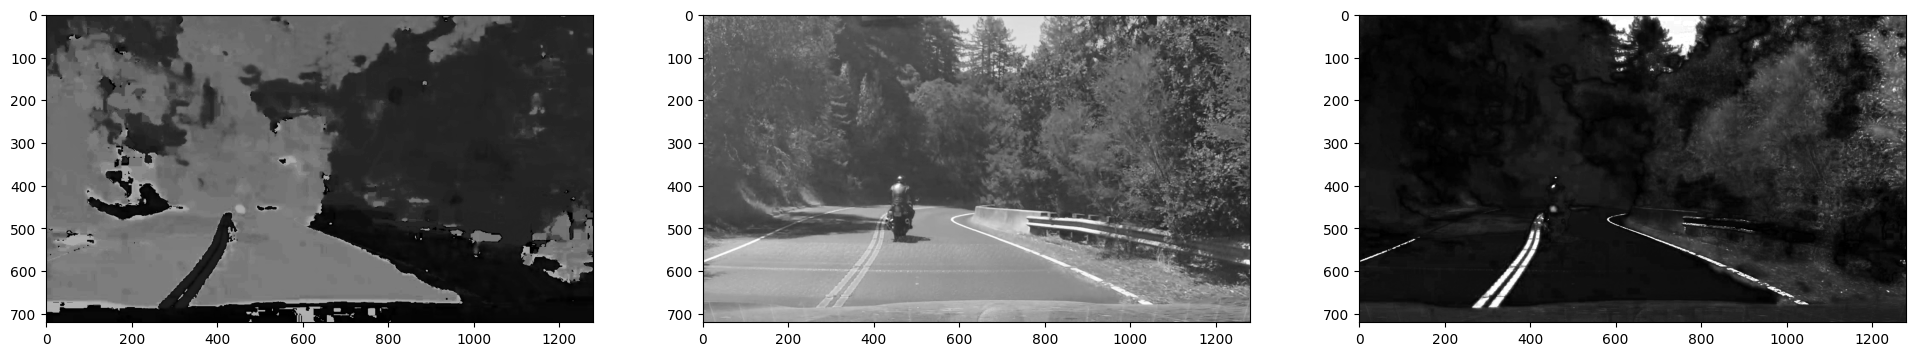

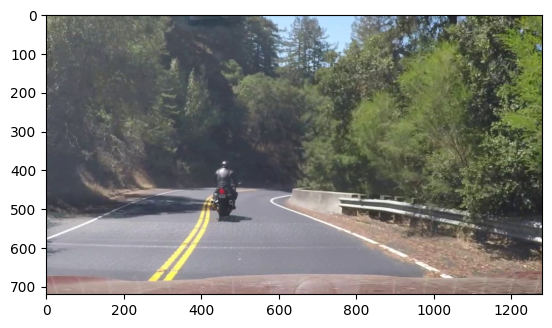

In [42]:
plot(img)

In [43]:
'''threshold_rel: 
This function performs relative thresholding, 
where the threshold values lo and hi are specified as fractions of the minimum and maximum intensity values in the image. 
The function calculates the actual threshold values vlo and vhi based on these fractions and then applies the threshold to the image. 
Pixels with intensities within the range [vlo, vhi] are set to white (255), and others are set to black (0).
'''

def threshold_rel(img, lo, hi):
    vmin = np.min(img)
    vmax = np.max(img)
    
    vlo = vmin + (vmax - vmin) * lo
    vhi = vmin + (vmax - vmin) * hi
    return np.uint8((img >= vlo) & (img <= vhi)) * 255

'''
threshold_abs: 
This function performs absolute thresholding, 
where the threshold values lo and hi are specified as absolute intensity values. 
The function directly applies these threshold values to the image. 
Pixels with intensities within the range [lo, hi] are set to white (255), and others are set to black (0).
'''

def threshold_abs(img, lo, hi):
    return np.uint8((img >= lo) & (img <= hi)) * 255

In [44]:
'''
Displays the original image and the thresholded versions of the lightness (l_channel) and saturation (s_channel) channels in one subplot 
and the result of combined thresholding of the hue (h_channel) and value (v_channel) channels in another subplot.
'''

def test(img):
    tmp = birdeye.forward(img)  # Applies a perspective transformation to the input image using a hypothetical birdeye.forward() method.
    tmp = np.copy(img)  # Copies the original image (img) into a temporary variable tmp.
    hls = cv2.cvtColor(tmp, cv2.COLOR_RGB2HLS)  # Converts the temporary image to HLS and HSV color spaces using OpenCV's cv2.cvtColor() func.
    hsv = cv2.cvtColor(tmp, cv2.COLOR_RGB2HSV)
    h_channel = hls[:,:,0]  # Extracts individual channels from the HLS and HSV representations.
    l_channel = hls[:,:,1]
    s_channel = hls[:,:,2]
    v_channel = hsv[:,:,2]
    
    f = plt.figure(figsize=(24, 16))
    ax1 = f.add_subplot(2, 2, 1)
    ax1.imshow(tmp)
    ax2 = f.add_subplot(2, 2, 2)
    ax2.imshow(threshold_rel(l_channel, 0.8, 1.0), vmin=0, vmax=255, cmap='gray')
    
    ax3 = f.add_subplot(2, 2, 3)
    ax3.imshow(threshold_rel(s_channel, 0.5, 0.8), vmin=0, vmax=255, cmap='gray')
    
    ax4 = f.add_subplot(2, 2, 4)
    res = threshold_abs(h_channel, 20, 30)
    res &= threshold_rel(v_channel, 0.7, 1.0)
    ax4.imshow(res, vmin=0, vmax=255, cmap='gray')

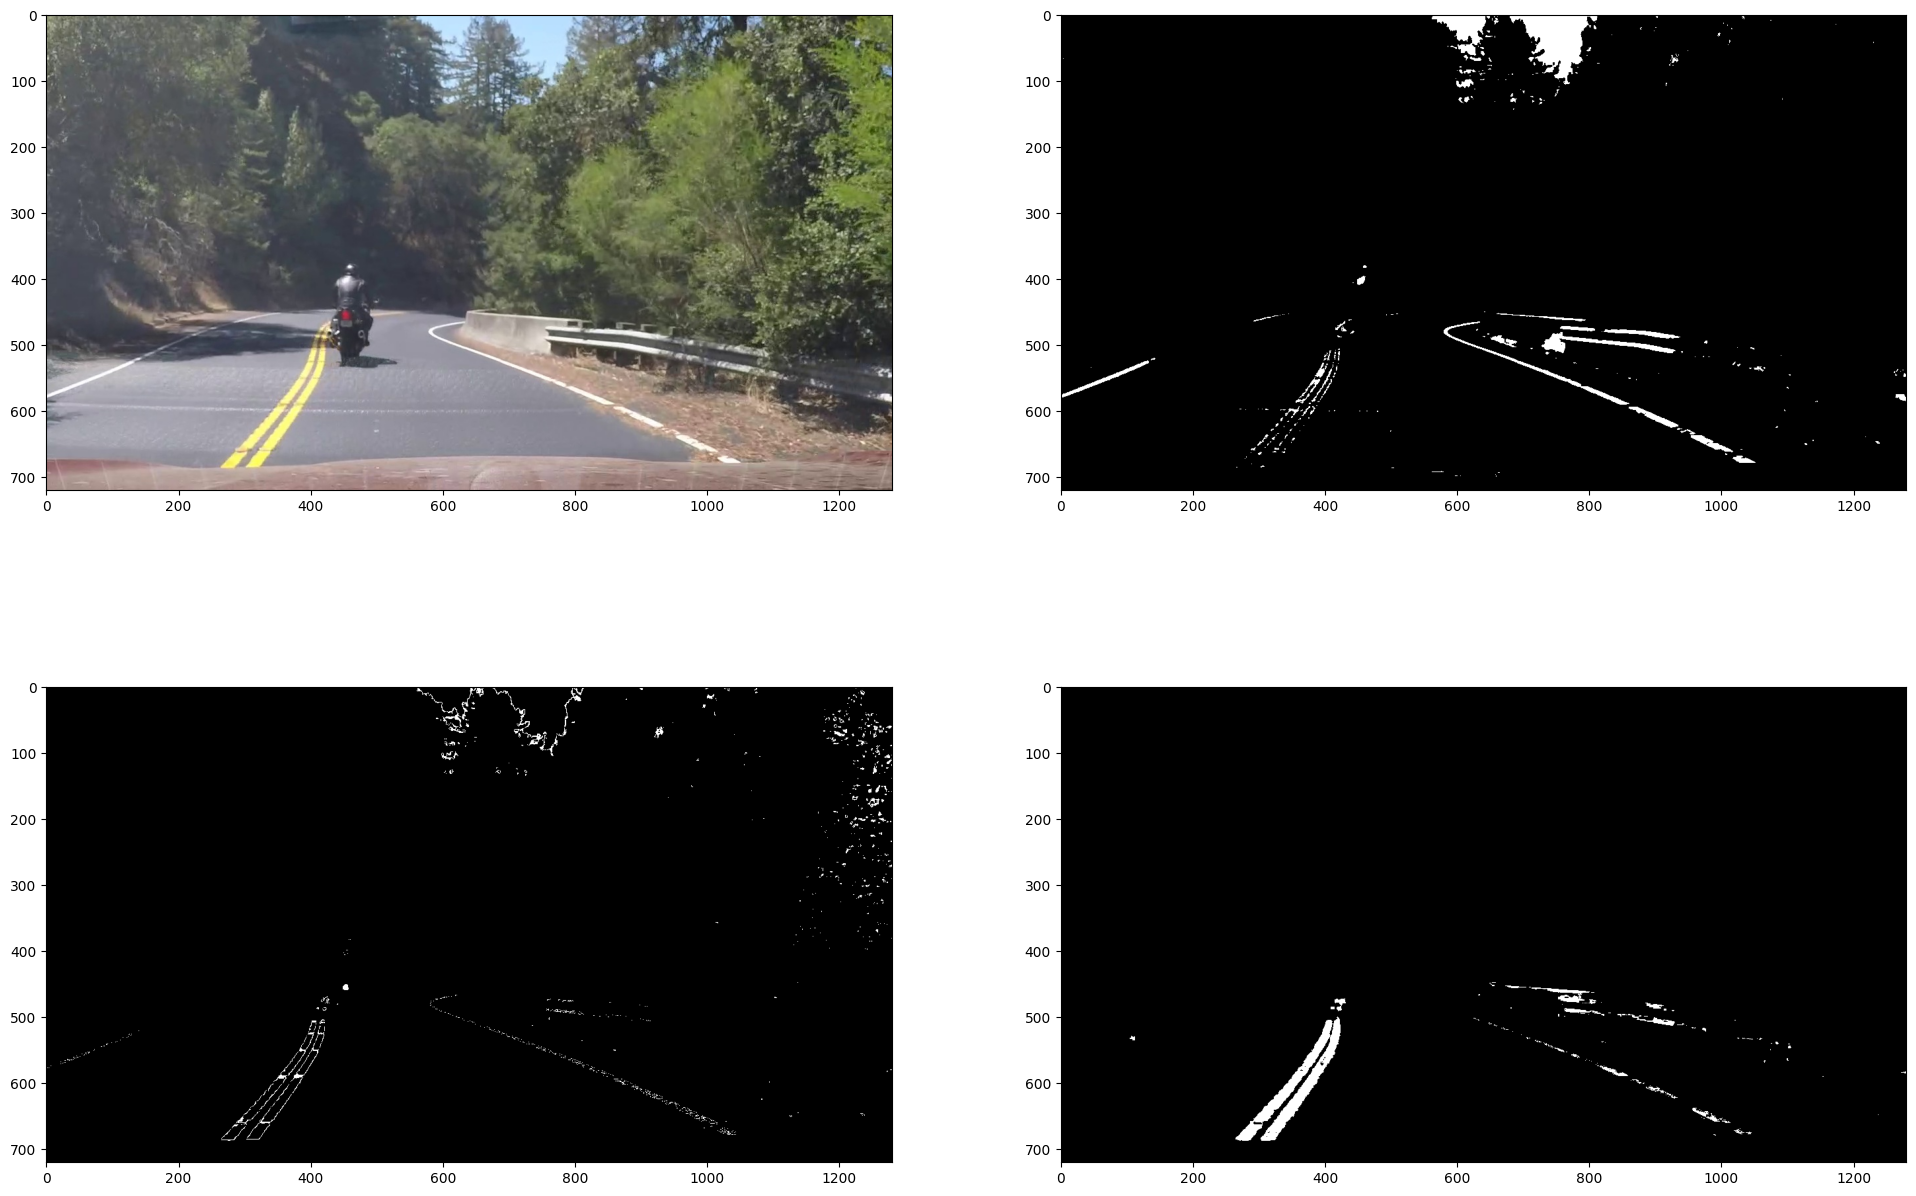

In [45]:
test(images2[2])

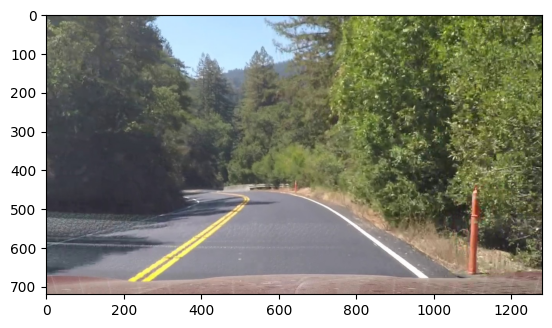

In [46]:
img = images2[1]
plt.imshow(img)

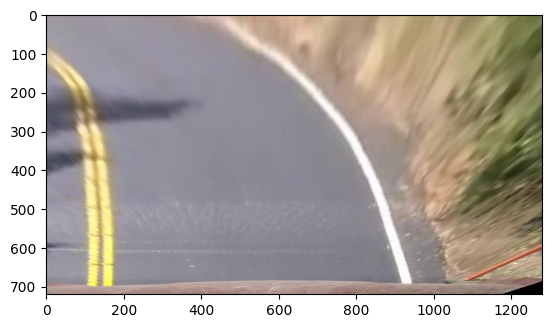

In [47]:
img1 = birdeye.forward(img)
plt.imshow(img1)

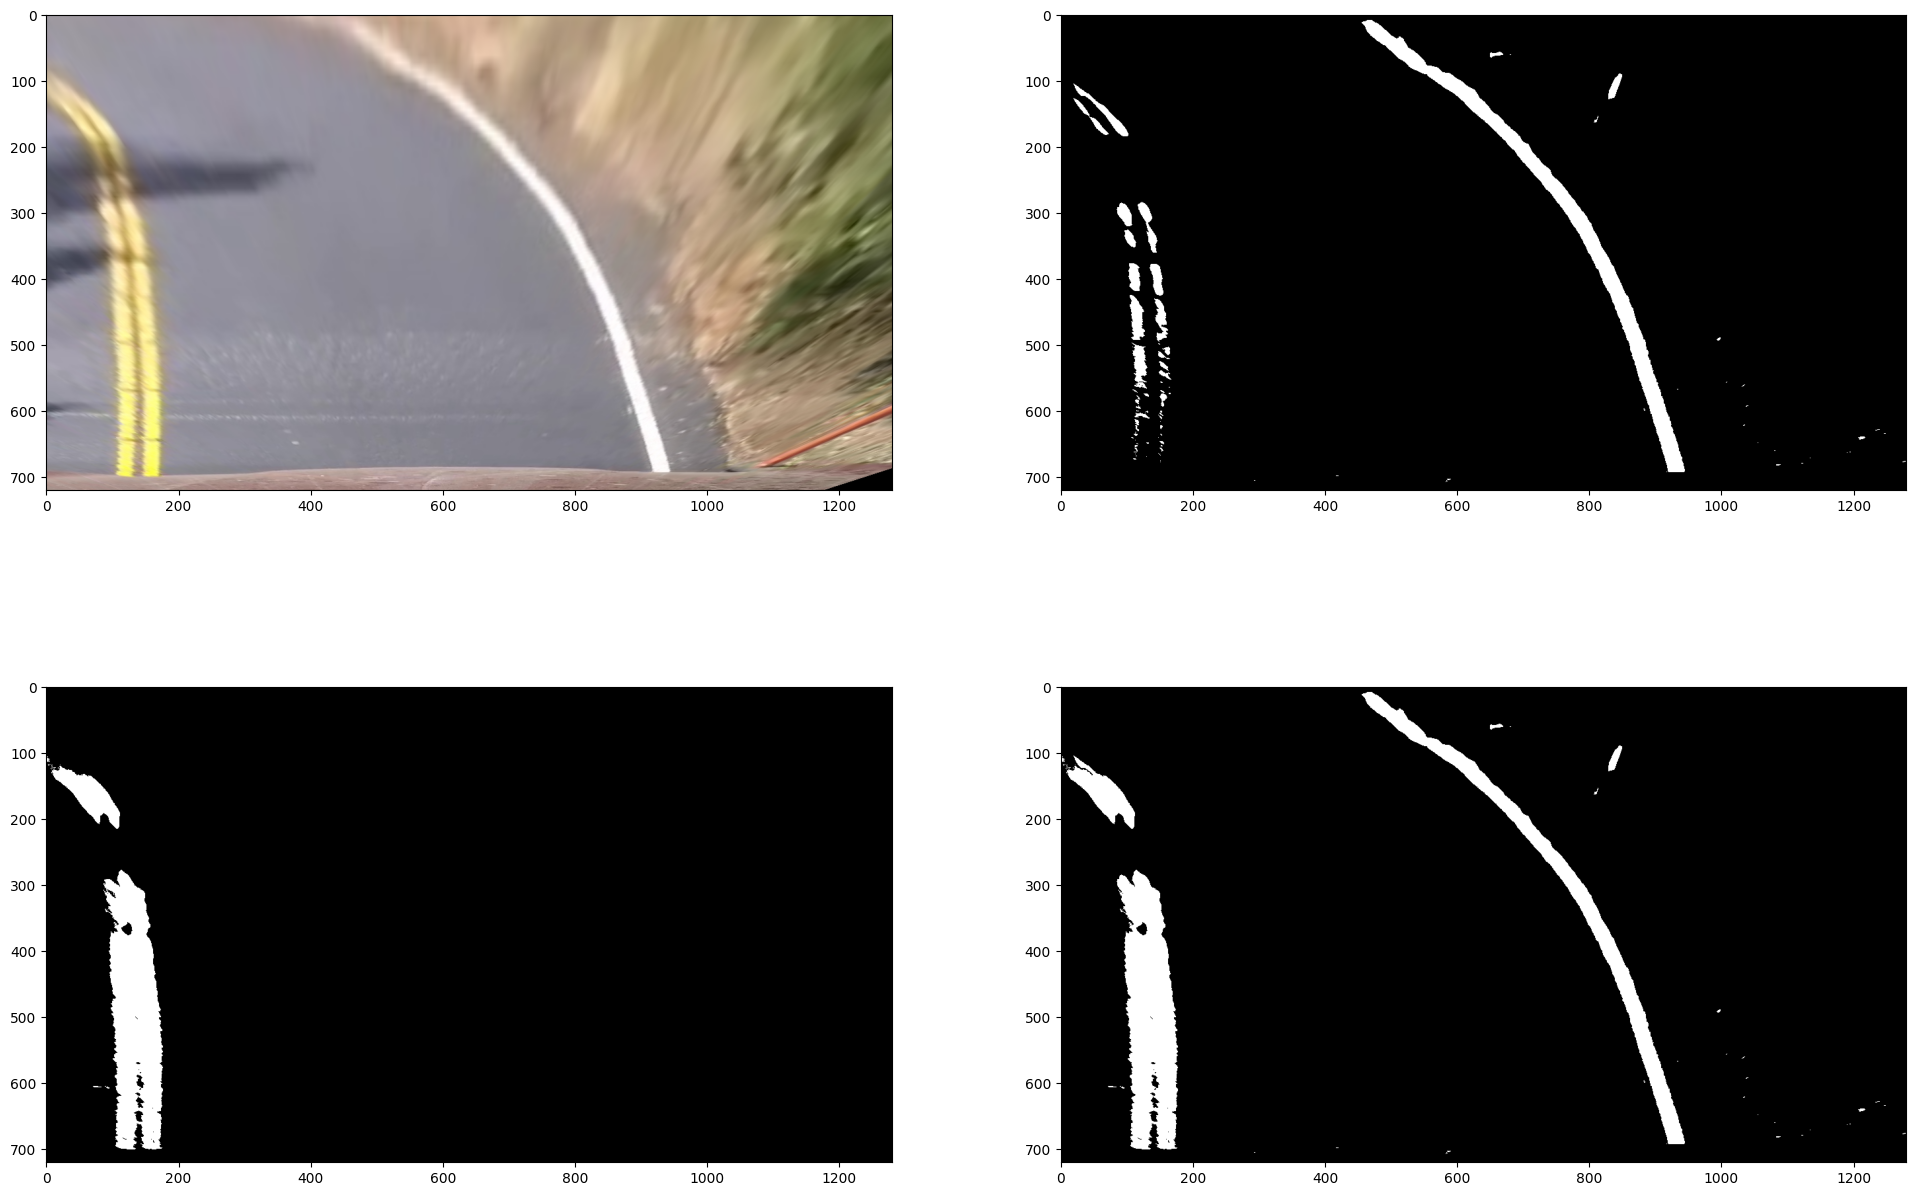

In [48]:
# process the input image for lane detection or similar tasks using color thresholding techniques.

hls = cv2.cvtColor(img1, cv2.COLOR_RGB2HLS) # Convert the input image img1 from RGB to HLS and HSV color spaces using OpenCV's cv2.cvtColor() func.
hsv = cv2.cvtColor(img1, cv2.COLOR_RGB2HSV)

# Extract the individual channels: hue (h_channel), lightness (l_channel), and saturation (s_channel) 
# from the HLS color space, and the value (v_channel) from the HSV color space.
h_channel = hls[:,:,0]
l_channel = hls[:,:,1]
s_channel = hls[:,:,2]
v_channel = hsv[:,:,2]

 
f = plt.figure(figsize=(24, 16)) # Create a figure (f) for plotting with a size of 24x16 inches.

ax1 = f.add_subplot(2, 2, 1)    # Original image (img1) is displayed in the top-left subplot (ax1).
ax1.imshow(img1)

ax2 = f.add_subplot(2, 2, 2)    # The thresholded lightness channel (l_channel) is displayed in the top-right subplot (ax2). 
right_lane = threshold_rel(l_channel, 0.8, 1.0) # Thresholding is applied with a range of 80% to 100% of the intensity range.

# right_lane[:,:750] = 0
ax2.imshow(right_lane, vmin=0, vmax=255, cmap='gray')

ax3 = f.add_subplot(2, 2, 3) #Combination of thresholded hue(h_channel) and value(v_channel) channels is displayed in the bottom-left subplot ax3
# Thresholding is applied with an absolute range for the hue channel and a relative range for the value channel.
# right portion of the thresholded image is masked out.
left_lane = threshold_abs(h_channel, 20, 30)    
left_lane &= threshold_rel(v_channel, 0.7, 1.0)
left_lane[:,550:] = 0   
ax3.imshow(left_lane, vmin=0, vmax=255, cmap='gray')

img2 = left_lane | right_lane
ax4 = f.add_subplot(2, 2, 4) #combined image (img2) resulting from combining the thresholded channels is displayed in the bottom-right subplot ax4
ax4.imshow(img2, vmin=0, vmax=255, cmap='gray')

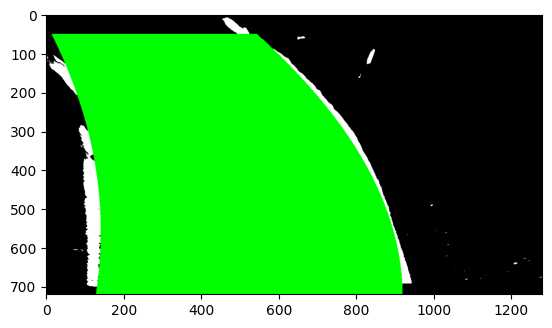

In [49]:
# lane detection or lane marking
# This will apply the lane detection or processing operation on img2 and display the resulting image (img3).

lanelines = LaneLines()
img3 = lanelines.forward(img2)
plt.imshow(img3)

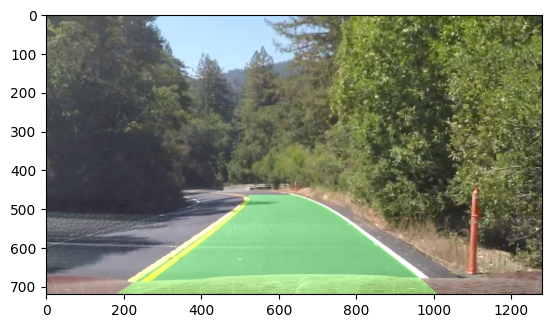

In [50]:
# Performing some operations involving a backward transformation using a class called birdeye. 
# This class or function handles the inverse transformation of the perspective transformation applied earlier. 
# Then, blending this transformed image (img4) with the original image (img) using OpenCV's cv2.addWeighted() function and displaying the result.

img4 = birdeye.backward(img3)
out_img = cv2.addWeighted(img, 1, img4, 0.3, 0)
plt.imshow(out_img)

In [60]:
birdeye = PerspectiveTransformation()   
lanelines = LaneLines()     #  initializing an instance of the LaneLines class
# This class is responsible for detecting lane lines in images or videos. 
# Initializing an instance of this class allows you to use its methods and properties to perform lane detection.

def process_image(img):
    # step 1 : image is transformed using the perspective transformation provided by the birdeye object.
    img1 = birdeye.forward(img)
    
    # step 2 :
    # Transformed image (img1) is converted to HLS and HSV color spaces, and specific channels are extracted.
    # Thresholding operations are then applied to these channels to isolate relevant features such as lane markings.
    hls = cv2.cvtColor(img1, cv2.COLOR_RGB2HLS)
    hsv = cv2.cvtColor(img1, cv2.COLOR_RGB2HSV)

    h_channel = hls[:,:,0]
    l_channel = hls[:,:,1]
    s_channel = hls[:,:,2]
    v_channel = hsv[:,:,2]

    right_lane = threshold_rel(l_channel, 0.8, 1.0)
    right_lane[:,:750] = 0

    left_lane = threshold_abs(h_channel, 20, 30)
    left_lane &= threshold_rel(v_channel, 0.7, 1.0)
    left_lane[:,550:] = 0

    img2 = left_lane | right_lane
    
    # step 3 : 
    # Thresholded image (img2) is processed by the lanelines object
    # performs lane detection or processing to identify lane boundaries or other relevant features.
    img3 = lanelines.forward(img2)
    
    # step 4 :
    # processed image (img3) is transformed back to the original perspective using the backward transformation provided by the birdeye object. 
    # The transformed image (img4) is then blended with the original image (img) using cv2.addWeighted() function.
    img4 = birdeye.backward(img3)
    out_img = cv2.addWeighted(img, 1, img4, 1, 0)
    
    return out_img

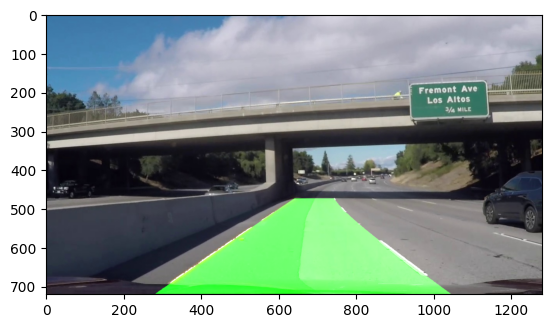

In [62]:
# plotting the resulting processed image
tmp = process_image(images[1])
plt.imshow(tmp)

In [63]:
# load a video file named "challenge_video.mp4" using MoviePy's VideoFileClip class. 
# This class allows you to work with video files in Python, including reading frames, applying transformations, and saving videos.

clip = VideoFileClip("challenge_video.mp4")

In [64]:
# Display the video named "challenge_video.mp4"
Video("challenge_video.mp4")

In [65]:
# Applying the process_image function to each frame of the video clip using MoviePy's fl_image method
out_clip = clip.fl_image(process_image)

# Saving the resulting video with the processed frames to a new file named "tmp.mp4" without audio.
out_clip.write_videofile("output_videos/tmp.mp4", audio=False)

Moviepy - Building video output_videos/tmp.mp4.
Moviepy - Writing video output_videos/tmp.mp4



t:   0%|          | 0/485 [00:00<?, ?it/s, now=None]

Moviepy - Done !
Moviepy - video ready output_videos/tmp.mp4


In [66]:
Video("output_videos/tmp.mp4")